<a href="https://colab.research.google.com/github/stormwhale/602-python/blob/main/602_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 602 Final Project:
### **Topic**: Do hybrid vehicles have statistical difference in fuel efficiency measured in miles-per-gallon(MPG) than Internal Combustion Engine(ICE) vehicles?

###Author: Chi Hang (Philip) Cheung

# **Part 1**
### Part 1 - Abstract/Introduction

>A dataset provided by the EPA was examined for fuel-efficiency between different engine class--hybrid, mild hybrid, and Internal Combustion Engine(ICE). Welch's ANOVA test and pairwise t-test were used to analyize statistical differences in Miles-Per-Gallon(MPG). A P-value<< 0.05 in combined MPG was observed between hybrid vehicles against both mild hybrid and ICE vehicles. However, there is no statistical difference in MPG between mild-hybrid vehicles and ICE vehicle.

>With recent adaptations and interests in battery technology for vehicles, many car manufactures are slowly transforming their car models to different types of battery hybrid vehicles for better performance and fuel efficiency measured in MPGs. In this study, we reviewed the EPA testing data for all 2025 car models in the market. The average combined MPGs (City and highway) of ICE, mild hybrid, and hybrid (AKA full hybrid) vehicles with engine cylinders equal to or less than 8 are compared and contrasted. With the condition that the response variable is the combined MPG and the explanatory variables are three different vehicle engine types. The null hypothesis test is that there is no statistical difference in MPGs between the three different engine types and the alternative hypothesis that there is statistical difference in at least one of the engine types. The relationships between each of the groups was examined by the pairwise t-test.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Part 2 - Data Wrangling


In [97]:
# Loading data from the EPA testing results:
url = "https://raw.githubusercontent.com/stormwhale/data-mines/refs/heads/main/Copy%20of%202025%20FE%20Guide%20for%20DOE-release%20dates%20before%2010-17-2024-no-sales%20-10-17-2024public.csv"

# loading the csv file:
epa = pd.read_csv(url)

# checking the data:
epa.head()

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe,Unnamed: 162,Unnamed: 163,Unnamed: 164
0,2025.0,aston martin,Aston Martin Lagonda Ltd,Vantage,ASX,2.0,4.0,8.0,Auto(A8),15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.0,BMW,BMW,Z4 M40i,BMX,352.0,3.0,6.0,Auto(S8),23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025.0,BMW,BMW,Z4 M40i,BMX,353.0,3.0,6.0,Manual(M6),19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025.0,BMW,BMW,Z4 sDrive30i,BMX,350.0,2.0,4.0,Auto(S8),25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025.0,Volkswagen Group of,Bugatti,Mistral,VGA,48.0,8.0,16.0,Auto(AM-S7),8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The dataframe is massive and needs cleaning.

In [103]:
#Subsetting the dataframe to only relevant columns:
df = epa[['Mfr Name','Carline','Eng Displ','Comb Unrd Adj FE - Conventional Fuel','Descriptor - Model Type (40 Char or less)','# Cyl']]

#Renaming the columns to understandable names:
df.columns = ['Manufacturer', 'Model', 'Engine_displacement', 'Combined_MPG', 'Engine_type', 'Cylinder_num']

df.head()

,Manufacturer,Model,Engine_displacement,Combined_MPG,Engine_type,Cylinder_num
0,aston martin,Vantage,4.0,17.9272,SIDI;,8.0
1,BMW,Z4 M40i,3.0,25.3007,SIDI;,6.0
2,BMW,Z4 M40i,3.0,21.5458,SIDI;,6.0
3,BMW,Z4 sDrive30i,2.0,28.0285,SIDI;,4.0
4,Volkswagen Group of,Mistral,8.0,9.4203,SIDI;,16.0


Checking for missing values:

In [104]:
df.isna().sum()

,0
Manufacturer,23
Model,23
Engine_displacement,23
Combined_MPG,23
Engine_type,58
Cylinder_num,23


Visualizing the missing values:

In [105]:
df[df.isna()]

,Manufacturer,Model,Engine_displacement,Combined_MPG,Engine_type,Cylinder_num
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
662,NaN,NaN,NaN,NaN,NaN,NaN
663,NaN,NaN,NaN,NaN,NaN,NaN
664,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN


Excluding empty rows:

In [106]:
#Filter out all the NA values from the Model and Manufacturer
df = df[df['Manufacturer'].notna() & df['Model'].notna()]

#Create a helper column to classify vehicle engine type:
df['Engine_class'] = np.nan

#Create a new helper column to differentiate the engine types.
#Setting a conditional map to automate the naming process:
mapping = {
    'Hybrid' :'hybrid',
    'Mild Hybrid' : 'mild hybrid'
}
for key, value in mapping.items():
    df.loc[df['Engine_type'].str.contains(key, case=False, na=False), 'Engine_class'] = value

#Assigning everything else as Internal Combustion Engine (ICE):
df['Engine_class'] = df['Engine_class'].fillna('ICE')

#Confirming the changes
df['Engine_class'].value_counts()


<ipython-input-106-7393cabc90d3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-7393cabc90d3>:14: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hybrid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

<ipython-input-106-7393cabc90d3>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
Engine_class,
ICE,458
mild hybrid,140
hybrid,46


In [107]:
df.head()

,Manufacturer,Model,Engine_displacement,Combined_MPG,Engine_type,Cylinder_num,Engine_class
0,aston martin,Vantage,4.0,17.9272,SIDI;,8.0,ICE
1,BMW,Z4 M40i,3.0,25.3007,SIDI;,6.0,ICE
2,BMW,Z4 M40i,3.0,21.5458,SIDI;,6.0,ICE
3,BMW,Z4 sDrive30i,2.0,28.0285,SIDI;,4.0,ICE
4,Volkswagen Group of,Mistral,8.0,9.4203,SIDI;,16.0,ICE


In [122]:
#Checking dataframe column types:
df.info()

#Convert the columns into the correct formats:
df[['Manufacturer', 'Model', 'Engine_type','Engine_class']] = df[['Manufacturer', 'Model', 'Engine_type', 'Engine_class']].astype('string')

#Dobule checking column types:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 643
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         644 non-null    object 
 1   Model                644 non-null    object 
 2   Engine_displacement  644 non-null    float64
 3   Combined_MPG         644 non-null    float64
 4   Engine_type          609 non-null    object 
 5   Cylinder_num         644 non-null    float64
 6   Engine_class         644 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 643
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         644 non-null    string 
 1   Model                644 non-null    string 
 2   Engine_displacement  644 non-null    float64
 3   Combined_MPG         644 non-null    float64

#Part 3 - Exploratory Data Analysis

Text(30.519367283950622, 0.5, 'Combined MPG')

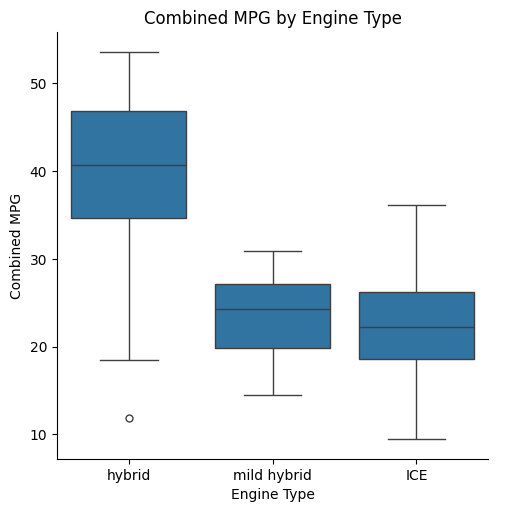

In [7]:
sns.catplot(x='Engine_class',
            y='Combined_MPG',
            kind='box',
            data=df,
            order=('hybrid', 'mild hybrid', 'ICE'))
plt.title('Combined MPG by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Combined MPG')

`Figure 1`
The boxplot of the Combined MPG showed an outlier and wide variations in hybrid and ICE types. Further investigation is needed.

Text(0.5, 1.02, 'Combined MPG Distribution by Engine Type')

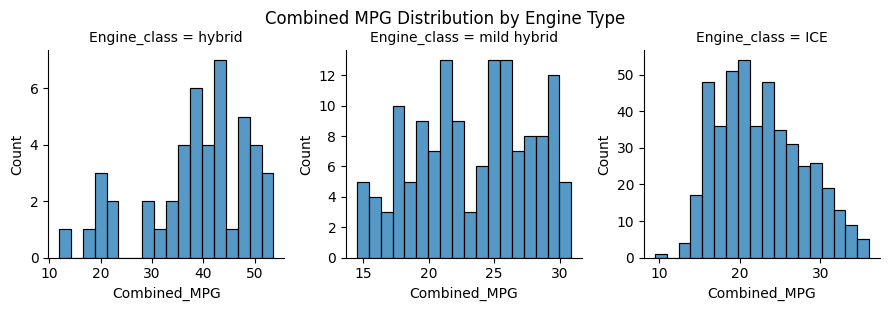

In [8]:
g = sns.FacetGrid(df, col= 'Engine_class', col_wrap=3, sharex=False, sharey=False, col_order=('hybrid', 'mild hybrid', 'ICE'))
g.map(sns.histplot, 'Combined_MPG', bins=18)
g.fig.suptitle('Combined MPG Distribution by Engine Type', y=1.02)

`Figure 2` Histogram of Combined MPGs for different engine classes confirms the outlier behaviors in the hybrid group.

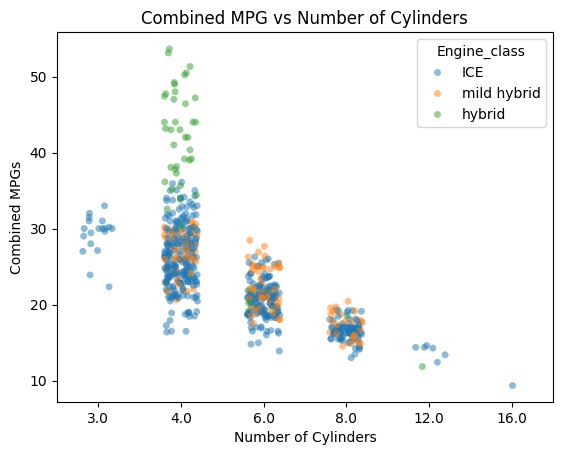

In [121]:
sns.stripplot(x='Cylinder_num',
            y='Combined_MPG',
            data=df,
            hue='Engine_class',
            jitter=0.2,
            alpha=0.5)


plt.title('Combined MPG vs Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Combined MPGs')
plt.show()

`Figure 3` The combined MPG vs Number of cylinders in cars plot reveals that there is an exponential decay in combined MPGs as the number of engine cylinders increase. In adition, the EPA dataset contains data from performance cars (engine cylinders above 8). These are the outliers showed from the plots above.

In [54]:
#Calculate the percentage of vehicles in each group of engine cylinders:
df2 = (df.groupby('Engine_class')['Cylinder_num'].value_counts(normalize=True)*100).round(1).reset_index(name='Percentage')
#Using plotly to graph the plot:
fig = px.histogram(df2,
       x='Engine_class',
       y='Percentage',
       color='Cylinder_num',
       barmode = 'group',
       text_auto=True)
fig.update_traces(textangle=0, textposition='outside')
fig.update_layout(title = 'Percentage of Vehicles by Engine Class and Number of Cylinders',
                  yaxis_title='percentage %',
                  xaxis_title='Engine Classes')

`Figure 4` The percentage distribution of vehicles by the number of cylinders. The percentage of vehicles above 8 cylinders are well below 3%. These performance cars are potential outliers that can be removed in this study.

In [30]:
#Creating the sorting order:
fig = px.histogram(df,
             y='Manufacturer',
             color='Engine_class',
                   title="layout.hovermode='x'").update_yaxes(categoryorder='total ascending')
fig.update_traces(hovertemplate=None)
fig.update_layout(title = '2025 Car models by Manufacturer and Engine class')


`Figure 5` GM is the biggest manufacturer of ICE vehicles while Toyota is the biggest manufacturer of hybrid vehicles.

Text(0.5, 1.02, 'Combined MPG Distribution by Engine Type with cylinder <=8')

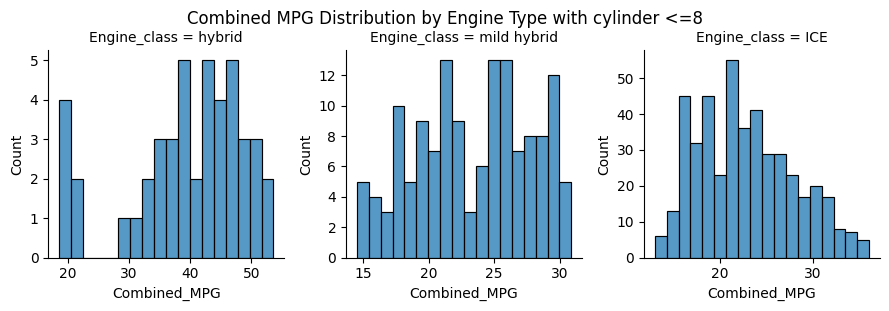

In [90]:
df3 = df[(df['Cylinder_num'] <=8)]
g = sns.FacetGrid(df3, col= 'Engine_class', col_wrap=3, sharex=False, sharey=False, col_order=('hybrid', 'mild hybrid', 'ICE'))
g.map(sns.histplot, 'Combined_MPG', bins=18)
g.fig.suptitle('Combined MPG Distribution by Engine Type with cylinder <=8', y=1.02)

`Figure 6` Histogram of the new dataframe where only less than or equal to 6 cylinders are considered to exclude outliers. The data is somewhat normally distributed. There are still some low MPG hybrid vehicles, which are heavy duty trucks. We will include them in the study as well since they are not performan cars.

#Part 4 - Statistical Analysis:

General ANOVA pre-test:
> We will use the Levene's test for homogeneity of variances before we can use the general ANOVA test:

In [91]:
#First, to anaylsis the data with Levene's test for homogeneity of variances before we can use Welch's ANOVA test:
from scipy.stats import levene

groups = [group['Combined_MPG'] for name, group in df.groupby('Engine_class')]
stat, p = levene(*groups)
print(f"Levene's test statistic: {stat:.2f}, p={p:.4f}")


Levene's test statistic: 27.05, p=0.0000


Since the p value is <<0.05, we reject the Null hypothesis that the variance is equal and therefore, we will use the Welch's ANOVA test to compare the three engine types.

In [93]:
#Welch's ANOVA test
import pingouin as pg
import pandas as pd

#Welch's ANOVA:
welch = pg.welch_anova(dv = 'Combined_MPG',
                       between = 'Engine_class',
                       data = df3)
print(welch)

         Source  ddof1       ddof2          F         p-unc       np2
0  Engine_class      2  103.996482  65.285833  4.281551e-19  0.376075


The P-value is 4.28^-19, which is extreme small compared to 0.05. Therefore, we reject the Null Hypothesis that is no difference between the MPGs between the three engine types. We will conduct the pairwise t-test to see which group is significant when compared to one another.

In [94]:
pg.pairwise_tests(dv='Combined_MPG',
                   between='Engine_class',
                   data=df3,
                   padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Engine_class,ICE,hybrid,False,True,-11.456427,46.601169,two-sided,3.760730e-15,1.128219e-14,bonf,5.127e+23,-2.901634
1,Engine_class,ICE,mild hybrid,False,True,-1.451152,267.578947,two-sided,1.479089e-01,4.437266e-01,bonf,0.297,-0.129079
2,Engine_class,hybrid,mild hybrid,False,True,10.804682,50.162517,two-sided,1.069323e-14,3.207969e-14,bonf,1.306e+18,2.613951


To summarize:
* ***ICE vs hybrid*** MPG, the corrected p_value = 1.128e-14 (**significant**) <<0.05
* ***ICE vs mild hybrid*** MPG, the corrected p_value = 4.437e-01 (**Insignificant**) >0.05
* ***Hybrid vs mild hybrid*** MPG, the corrected p_value = 3.208e-13 (**significant**) <<0.05


---


>> 1) Hybrid engines have statistical MPG difference when compared to ICE and mild hybrid engines.

>> 2) ICEs have no statistical MPG difference than mild hybrid engines.

---



# Part 5 - Conclusion:
>In this study, we examined all the 2025 vehicle models in the market. The MPG data is provided by the EPA. Vehicles with engine cylinders above 8 are excluded from this study since they are designed as performance vehicles and their numbers are relatively low. However, the MPGs of these performance vehicles are significantly lower than the rest of the group. Therefore, they were considered as outliers and excluded from the analysis.

>Three main engine classes were tested for homogeneity of variance by the Levene's test and found that the p-value is below 0.05, which we could not reject the Null hypothesis. Therefore, we proceeded to use the Welch's ANOVA test. The P-value was 4.28^-19, which is below 0.05, allowing us to reject the null hypothesis that the MPG differences are due to randomness.

>Finally, we used the pairwise t-test to further investigate which group was having a significant MPG difference. Comparison between hybrid against ICE and hybrid against mild_hybrid are the only groups that showed significance in terms of MPG (p-values <<0.05). Meanwhile ICE and mild hybrid vehicles did not show significant difference. This makes sense because mild hybrid vehicles do not have a strong enough electric motor to drive the vehicle. The battery and the electric motor is designed only to assist the ICE in situations such as at low-speed, which is the most inefficient phase of the ICE. Therefore, the fuel-efficiency between a mild hybrid and ICE is not of statistical significance. On the other hand, hybrid, or full-hybrid, vehicles have multiple electric motors to provide power to the wheels for motion. Hybrid vehicles are capable of driving itself even when the gas engine is completely shut-off, achieving the maximum fuel-efficiency. Although the pairwise t-test is not a one-tail t-test that indicates the test direction, indicating whether the MPG difference is due to hybrid being more fuel-efficient or vice-versa, the plots from the exploratory analysis have already shown enough hints that the mean MPGs values for the hybrid vehicles are much higher than the other two groups. Consequently, we are confident in the results that hybrid vehicles can achieve significantly better MPG than ICE and mild hybrid vehicles.

Citation:
>EPA link:
https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy